# [Part 2] Exploratory Data Analysis (EDA)

## Install conda and rdkit

In [1]:
! pip install rdkit

## Load bioactivity data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("acetylcholinesterase_03_bioactivity_data_curated.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active
...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive


In [4]:
df_no_smiles = df.drop(columns="canonical_smiles") # drop() : 해당 column 날리기

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
    cpd = str(i).split(".")
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name="canonical_smiles")

# tolist() : 주로 pandas의 DataFrame, Series type을 list 형태로 변경할 때 사용

In [6]:
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.000,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.000,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.000,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.000,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.000,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6152,CHEMBL5219841,0.209,active,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1
6153,CHEMBL5219046,274.000,active,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1
6154,CHEMBL5219594,76200.000,inactive,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
6155,CHEMBL5219958,55000.000,inactive,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1


## Calculate Lipinski descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:
  * Molecular weight < 500 Dalton
  * Octanol-water partition coefiicient (LogP) < 5
  * Hydrogen bond donors < 5
  * Hydrogen bond acceptors < 10>

## Import libraries

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Calculate descriptors

In [8]:
# Inspried by: https://codeocean.com/explore/oapsules?query=tag:data-ouration

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

# verbose=True/False : 상세한 로깅(logging)을 출력할지말지 조정하는 parameter
# Chem.MolFromSmiles() : molecular object로 나타내기
# Descriptor : 보통 분자의 물리화학적인 성질이나 화학 구조를 수치적으로 표현한 것

In [9]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6152,390.461,2.8334,2.0,5.0
6153,352.478,5.0610,1.0,3.0
6154,287.246,2.1994,1.0,4.0
6155,311.337,3.1837,1.0,4.0


## Combine DataFrames

In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active
...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive


In [11]:
df_combined = pd.concat([df, df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1.0,3.0
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1.0,4.0
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1.0,4.0


## Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

  * Take the IC50 values fromn the standard_value column and converts it from nM to M by multiplying the value by  10-9
  * Take the molar value and apply -log10
  * Delete the standard_value column and create a new pIC50 column

In [13]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    
    return input

# Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [14]:
df_combined.standard_value.describe()

count    6.157000e+03
mean     1.064665e+05
std      9.218081e+05
min      0.000000e+00
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [15]:
-np.log10((10**-9)* 100000000)

1.0

In [16]:
-np.log10((10**-9)*10000000000)

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
        
    return input

# We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0.0,6.0,750.000
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0.0,5.0,100.000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0.0,5.0,50000.000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0.0,5.0,300.000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0.0,6.0,800.000
...,...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0,0.209
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1.0,3.0,274.000
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1.0,4.0,76200.000
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1.0,4.0,55000.000


In [19]:
df_norm.standard_value_norm.describe()

count    6.157000e+03
mean     1.064665e+05
std      9.218081e+05
min      0.000000e+00
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_78451/1092395349.py:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0.0,6.0,750.000,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0.0,5.0,100.000,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0.0,5.0,50000.000,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0.0,5.0,300.000,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0.0,6.0,800.000,6.096910
...,...,...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0,0.209,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1.0,3.0,274.000,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1.0,4.0,76200.000,4.118045
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1.0,4.0,55000.000,4.259637


In [21]:
df_final.pIC50.describe()

count    6157.000000
mean             inf
std              NaN
min         1.304518
25%         4.769551
50%         5.638272
75%         6.829738
max              inf
Name: pIC50, dtype: float64

In [22]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

## Removing the "intermediate" bioactivity class

In [23]:
df_2class = df_final[df_final["class"] != "intermediate"]
df_2class

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.80320,0.0,6.0,750.000,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.55460,0.0,5.0,100.000,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.35740,0.0,5.0,50000.000,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.70690,0.0,5.0,300.000,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.09530,0.0,6.0,800.000,6.096910
...,...,...,...,...,...,...,...,...,...,...
6151,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,114.000,active,454.057,6.19482,0.0,5.0,114.000,6.943095
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.83340,2.0,5.0,0.209,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.06100,1.0,3.0,274.000,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.19940,1.0,4.0,76200.000,4.118045


In [24]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import library

In [25]:
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


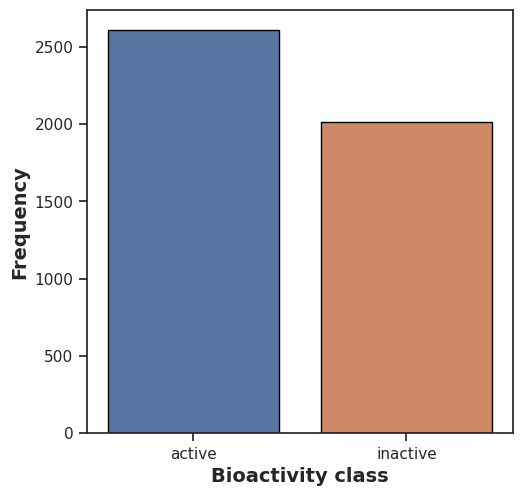

In [26]:
plt.figure(figsize =(5.5, 5.5))

sns.countplot(x="class", data=df_2class, edgecolor="black")

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")

plt.savefig("plot_bioactivity_class.pdf")

### Scatter plot of MW versus LogP

It can be seen that the 2 bioactivity classes are spanning similar chemical space as evident by the scatter plot of MW vs LogP

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig("plot_MW_vs_LogP.pdf")

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_

KeyboardInterrupt: 

## Box plot

### pIC50 value

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


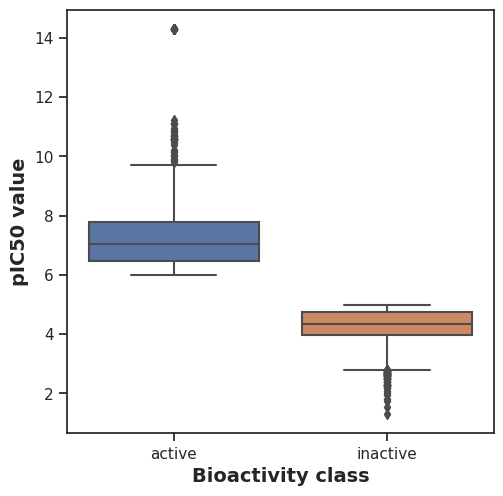

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### Statistical analysis | Mann-Whitney U Test

In [33]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [34]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5247296.0,0.0,0.05,Different distribution (reject H0)


### MW

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


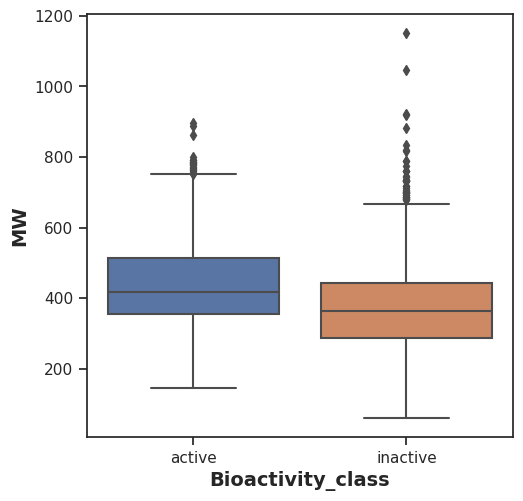

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = "class", y="MW", data=df_2class)

plt.xlabel("Bioactivity_class", fontsize=14, fontweight="bold")
plt.ylabel("MW", fontsize=14, fontweight="bold")

plt.savefig("plot_MW.pdf")

In [36]:
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3402939.0,2.507151e-67,0.05,Different distribution (reject H0)


### LogP

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


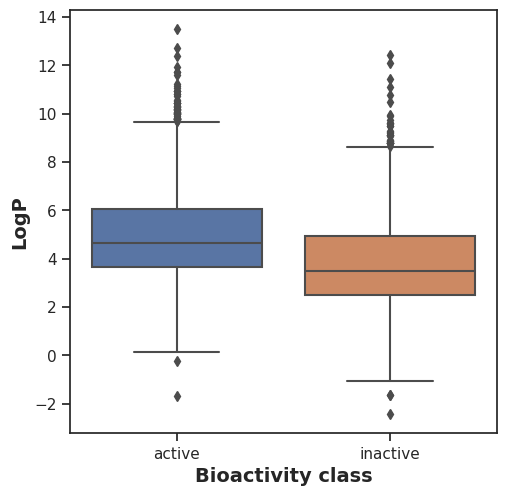

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x="class", y="LogP", data=df_2class)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")

plt.savefig("plot_LogP.pdf")

In [40]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3530973.5,1.340067e-90,0.05,Different distribution (reject H0)


### NumHDonors

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


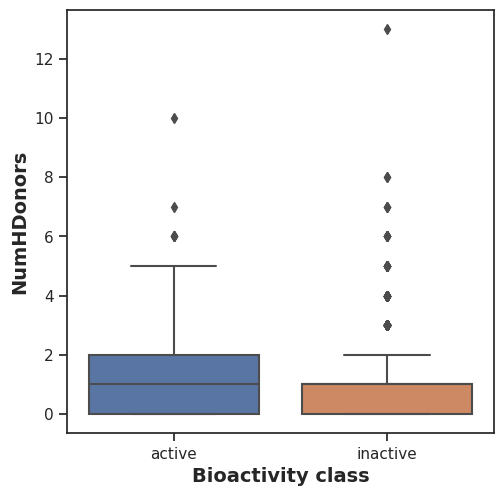

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [42]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3004079.0,6.682669e-19,0.05,Different distribution (reject H0)


### NumHAcceptors

/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dbsejrgus226/miniconda3/envs/606server_virtual_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


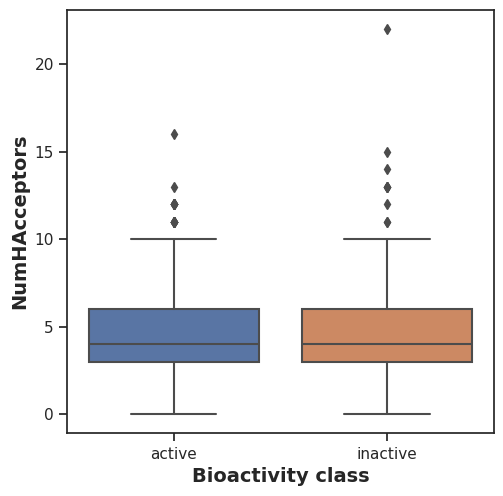

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [44]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2826735.5,0.000005,0.05,Different distribution (reject H0)


## Interpretation of Statistical Results

### Box Plots

### pIC50 values

Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

### Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited *statistically significant difference* between the actives and inactives.

In [46]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 7%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 75%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: acetycholinesterase_01_bioactivityt_data_raw.csv (deflated 91%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 74%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: actylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
